In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

In [59]:
starbucks = pd.read_csv('./data/starbucks.csv')
cafes = pd.read_csv('./data/cafe.csv')
home = pd.read_csv('./data/multi.csv')

### transfer geodataframe

In [7]:
cafes

,개방자치단체코드,관리번호,인허가일자,소재지면적,소재지우편번호,소재지전체주소,도로명전체주소,도로명우편번호,사업장명,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,시설총규모
0,3000000,3000000-104-1967-09740,1967-10-13,76.02,110-836,서울특별시 종로구 종로5가 182-3 (1층),"서울특별시 종로구 종로 222 (종로5가,(1층))",3196.0,왕관 커피숍,커피숍,200138.733378,452051.937703,커피숍,76.02
1,3000000,3000000-104-1970-09739,1970-02-02,NaN,110-420,서울특별시 종로구 관수동 4-1번지 (지하1층),"서울특별시 종로구 수표로 93-1 (관수동,(지하1층))",3191.0,아사녀,커피숍,198979.758848,451921.599184,커피숍,112.60
2,3080000,3080000-104-1971-01601,1971-11-15,126.00,142-803,서울특별시 강북구 미아동 190-1번지,서울특별시 강북구 도봉로 242 (미아동),1132.0,마니커피숍,커피숍,202132.411671,458690.802597,커피숍,126.00
3,3070000,3070000-104-1985-08619,1985-01-12,77.23,136-869,서울특별시 성북구 하월곡동 74-11번지,"서울특별시 성북구 오패산로13길 33, 지하1층 (하월곡동)",2738.0,솔커피숍,커피숍,202991.738067,456049.806513,커피숍,77.23
4,3060000,3060000-104-1989-07586,1989-05-13,62.00,131-833,서울특별시 중랑구 면목동 523-10 지1층,"서울특별시 중랑구 사가정로 429, 지하1층 (면목동)",2214.0,현커피숍,커피숍,208086.610684,453160.318741,커피숍,62.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14496,3030000,3030000-104-2024-00085,2024-08-12,15.80,133-809,서울특별시 성동구 금호동4가 1114,"서울특별시 성동구 독서당로 287, 1층 101호 (금호동4가)",4725.0,미스홍삼,커피숍,201782.336238,449525.356028,커피숍,15.80
14497,3140000,3140000-104-2024-00163,2024-08-12,29.60,158-717,서울특별시 양천구 목동 923-15 굿모닝탑,"서울특별시 양천구 목동서로 221, 굿모닝탑 112호 (목동)",7995.0,바나프레소 목동점,커피숍,188500.639657,447270.178927,커피숍,29.60
14498,3220000,3220000-104-2024-00526,2024-08-12,NaN,135-731,서울특별시 강남구 삼성동 159 코엑스,"서울특별시 강남구 영동대로 513, 코엑스 3층 C Hall호 (삼성동)",6164.0,일리카페IBM점(한시적),커피숍,205130.591679,445590.096838,커피숍,0.00
14499,3220000,3220000-104-2024-00530,2024-08-12,NaN,135-902,서울특별시 강남구 압구정동 494 갤러리아백화점,"서울특별시 강남구 압구정로 343, 갤러리아백화점명품관WEST 식품관 B1층 (압구정동)",6008.0,(주)테라도스(한시적),커피숍,203470.848439,447369.579852,커피숍,0.00


In [8]:
import pandas as pd
from pyproj import Proj, transform

# Define the transformation function
def transform_coordinates(x, y, proj_src, proj_dst):
    lon, lat = transform(proj_src, proj_dst, x, y)
    return lat, lon

# Define the source and destination projections
proj_tm = Proj('+proj=tmerc +lat_0=38 +lon_0=127.0028902777778 +k=1 +x_0=200000 +y_0=500000 +ellps=bessel +units=m +no_defs +towgs84=-115.80,474.99,674.11,1.16,-2.31,-1.63,6.43')
proj_wgs84 = Proj(proj='latlong', datum='WGS84')

# Apply the transformation to each row
cafes[['Latitude', 'Longitude']] = cafes.apply(
    lambda row: transform_coordinates(row['좌표정보(X)'], row['좌표정보(Y)'], proj_tm, proj_wgs84), axis=1, result_type='expand'
)

# Display the transformed DataFrame
cafes.head()

/tmp/ipykernel_753685/894419056.py:6: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat = transform(proj_src, proj_dst, x, y)


,개방자치단체코드,관리번호,인허가일자,소재지면적,소재지우편번호,소재지전체주소,도로명전체주소,도로명우편번호,사업장명,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,시설총규모,Latitude,Longitude
0,3000000,3000000-104-1967-09740,1967-10-13,76.02,110-836,서울특별시 종로구 종로5가 182-3 (1층),"서울특별시 종로구 종로 222 (종로5가,(1층))",3196.0,왕관 커피숍,커피숍,200138.733378,452051.937703,커피숍,76.02,37.570755,127.002358
1,3000000,3000000-104-1970-09739,1970-02-02,NaN,110-420,서울특별시 종로구 관수동 4-1번지 (지하1층),"서울특별시 종로구 수표로 93-1 (관수동,(지하1층))",3191.0,아사녀,커피숍,198979.758848,451921.599184,커피숍,112.60,37.569580,126.989240
2,3080000,3080000-104-1971-01601,1971-11-15,126.00,142-803,서울특별시 강북구 미아동 190-1번지,서울특별시 강북구 도봉로 242 (미아동),1132.0,마니커피숍,커피숍,202132.411671,458690.802597,커피숍,126.00,37.630568,127.024945
3,3070000,3070000-104-1985-08619,1985-01-12,77.23,136-869,서울특별시 성북구 하월곡동 74-11번지,"서울특별시 성북구 오패산로13길 33, 지하1층 (하월곡동)",2738.0,솔커피숍,커피숍,202991.738067,456049.806513,커피숍,77.23,37.606771,127.034669
4,3060000,3060000-104-1989-07586,1989-05-13,62.00,131-833,서울특별시 중랑구 면목동 523-10 지1층,"서울특별시 중랑구 사가정로 429, 지하1층 (면목동)",2214.0,현커피숍,커피숍,208086.610684,453160.318741,커피숍,62.00,37.580707,127.092337


In [9]:
import pandas as pd
from pyproj import Proj, transform

# Define the transformation function
def transform_coordinates(x, y, proj_src, proj_dst):
    lon, lat = transform(proj_src, proj_dst, x, y)
    return lat, lon

# Define the source and destination projections
proj_tm = Proj('+proj=tmerc +lat_0=38 +lon_0=127.0028902777778 +k=1 +x_0=200000 +y_0=500000 +ellps=bessel +units=m +no_defs +towgs84=-115.80,474.99,674.11,1.16,-2.31,-1.63,6.43')
proj_wgs84 = Proj(proj='latlong', datum='WGS84')

# Apply the transformation to each row
starbucks[['Latitude', 'Longitude']] = starbucks.apply(
    lambda row: transform_coordinates(row['좌표정보(X)'], row['좌표정보(Y)'], proj_tm, proj_wgs84), axis=1, result_type='expand'
)

# Display the transformed DataFrame
starbucks.head()

/tmp/ipykernel_753685/1304689399.py:6: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat = transform(proj_src, proj_dst, x, y)


,개방자치단체코드,관리번호,인허가일자,소재지면적,소재지우편번호,소재지전체주소,도로명전체주소,도로명우편번호,사업장명,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,시설총규모,Latitude,Longitude
0,3020000,3020000-104-1998-02305,1998-03-04,432.28,140-133,"서울특별시 용산구 청파동3가 111-35 가동 지상1,2,3층","서울특별시 용산구 청파로47길 57 (청파동3가, 가동 지상1,2,3층)",4313.0,스타벅스숙대점,커피숍,197035.083960,449151.762231,커피숍,432.28,37.544620,126.967238
1,3120000,3120000-104-1999-03908,1999-07-15,217.56,120-808,"서울특별시 서대문구 대현동 54-4 외 2필지(54-5,54-31) 신흥빌딩 1~3층","서울특별시 서대문구 이화여대길 34, 1~3층 (대현동)",3767.0,스타벅스 이대R점,커피숍,195155.273886,450692.233516,커피숍,217.56,37.558492,126.945957
2,3180000,3180000-104-2000-13733,2000-09-30,203.30,150-876,서울특별시 영등포구 여의도동 23-9,서울특별시 영등포구 국제금융로2길 28 (여의도동),7325.0,스타벅스여의도점,다방,193258.909941,446869.352858,다방,203.30,37.524036,126.924530
3,3220000,3220000-104-2001-23160,2001-03-07,264.00,135-892,서울특별시 강남구 신사동 580-2,서울특별시 강남구 압구정로 170 (신사동),6030.0,스타벅스압구정역점,다방,202415.806640,447167.155852,다방,264.00,37.526741,127.028118
4,3030000,3030000-104-2001-06823,2001-04-17,242.81,133-070,"서울특별시 성동구 행당동 31-4 ,10,11",NaN,NaN,스타벅스-한양대점,커피숍,203655.645593,450556.384307,커피숍,242.81,37.557274,127.042161


In [11]:
geometry = [Point(xy) for xy in zip(cafes['Longitude'], cafes['Latitude'])]
gdf_cafes = gpd.GeoDataFrame(cafes, geometry=geometry, crs="EPSG:4326")
gdf_cafes

,개방자치단체코드,관리번호,인허가일자,소재지면적,소재지우편번호,소재지전체주소,도로명전체주소,도로명우편번호,사업장명,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,시설총규모,Latitude,Longitude,geometry
0,3000000,3000000-104-1967-09740,1967-10-13,76.02,110-836,서울특별시 종로구 종로5가 182-3 (1층),"서울특별시 종로구 종로 222 (종로5가,(1층))",3196.0,왕관 커피숍,커피숍,200138.733378,452051.937703,커피숍,76.02,37.570755,127.002358,POINT (127.00236 37.57076)
1,3000000,3000000-104-1970-09739,1970-02-02,NaN,110-420,서울특별시 종로구 관수동 4-1번지 (지하1층),"서울특별시 종로구 수표로 93-1 (관수동,(지하1층))",3191.0,아사녀,커피숍,198979.758848,451921.599184,커피숍,112.60,37.569580,126.989240,POINT (126.98924 37.56958)
2,3080000,3080000-104-1971-01601,1971-11-15,126.00,142-803,서울특별시 강북구 미아동 190-1번지,서울특별시 강북구 도봉로 242 (미아동),1132.0,마니커피숍,커피숍,202132.411671,458690.802597,커피숍,126.00,37.630568,127.024945,POINT (127.02494 37.63057)
3,3070000,3070000-104-1985-08619,1985-01-12,77.23,136-869,서울특별시 성북구 하월곡동 74-11번지,"서울특별시 성북구 오패산로13길 33, 지하1층 (하월곡동)",2738.0,솔커피숍,커피숍,202991.738067,456049.806513,커피숍,77.23,37.606771,127.034669,POINT (127.03467 37.60677)
4,3060000,3060000-104-1989-07586,1989-05-13,62.00,131-833,서울특별시 중랑구 면목동 523-10 지1층,"서울특별시 중랑구 사가정로 429, 지하1층 (면목동)",2214.0,현커피숍,커피숍,208086.610684,453160.318741,커피숍,62.00,37.580707,127.092337,POINT (127.09234 37.58071)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14496,3030000,3030000-104-2024-00085,2024-08-12,15.80,133-809,서울특별시 성동구 금호동4가 1114,"서울특별시 성동구 독서당로 287, 1층 101호 (금호동4가)",4725.0,미스홍삼,커피숍,201782.336238,449525.356028,커피숍,15.80,37.547990,127.020957,POINT (127.02096 37.54799)
14497,3140000,3140000-104-2024-00163,2024-08-12,29.60,158-717,서울특별시 양천구 목동 923-15 굿모닝탑,"서울특별시 양천구 목동서로 221, 굿모닝탑 112호 (목동)",7995.0,바나프레소 목동점,커피숍,188500.639657,447270.178927,커피숍,29.60,37.527600,126.870696,POINT (126.8707 37.5276)
14498,3220000,3220000-104-2024-00526,2024-08-12,NaN,135-731,서울특별시 강남구 삼성동 159 코엑스,"서울특별시 강남구 영동대로 513, 코엑스 3층 C Hall호 (삼성동)",6164.0,일리카페IBM점(한시적),커피숍,205130.591679,445590.096838,커피숍,0.00,37.512521,127.058820,POINT (127.05882 37.51252)
14499,3220000,3220000-104-2024-00530,2024-08-12,NaN,135-902,서울특별시 강남구 압구정동 494 갤러리아백화점,"서울특별시 강남구 압구정로 343, 갤러리아백화점명품관WEST 식품관 B1층 (압구정동)",6008.0,(주)테라도스(한시적),커피숍,203470.848439,447369.579852,커피숍,0.00,37.528561,127.040055,POINT (127.04005 37.52856)


In [56]:
geometry = [Point(xy) for xy in zip(starbucks['Longitude'], starbucks['Latitude'])]
gdf_starbucks = gpd.GeoDataFrame(starbucks, geometry=geometry, crs="EPSG:4326")
gdf_starbucks

,개방자치단체코드,관리번호,인허가일자,소재지면적,소재지우편번호,소재지전체주소,도로명전체주소,도로명우편번호,사업장명,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,시설총규모,Latitude,Longitude,geometry
0,3020000,3020000-104-1998-02305,1998-03-04,432.28,140-133,"서울특별시 용산구 청파동3가 111-35 가동 지상1,2,3층","서울특별시 용산구 청파로47길 57 (청파동3가, 가동 지상1,2,3층)",4313.0,스타벅스숙대점,커피숍,197035.083960,449151.762231,커피숍,432.28,37.544620,126.967238,POINT (126.96724 37.54462)
1,3120000,3120000-104-1999-03908,1999-07-15,217.56,120-808,"서울특별시 서대문구 대현동 54-4 외 2필지(54-5,54-31) 신흥빌딩 1~3층","서울특별시 서대문구 이화여대길 34, 1~3층 (대현동)",3767.0,스타벅스 이대R점,커피숍,195155.273886,450692.233516,커피숍,217.56,37.558492,126.945957,POINT (126.94596 37.55849)
2,3180000,3180000-104-2000-13733,2000-09-30,203.30,150-876,서울특별시 영등포구 여의도동 23-9,서울특별시 영등포구 국제금융로2길 28 (여의도동),7325.0,스타벅스여의도점,다방,193258.909941,446869.352858,다방,203.30,37.524036,126.924530,POINT (126.92453 37.52404)
3,3220000,3220000-104-2001-23160,2001-03-07,264.00,135-892,서울특별시 강남구 신사동 580-2,서울특별시 강남구 압구정로 170 (신사동),6030.0,스타벅스압구정역점,다방,202415.806640,447167.155852,다방,264.00,37.526741,127.028118,POINT (127.02812 37.52674)
4,3030000,3030000-104-2001-06823,2001-04-17,242.81,133-070,"서울특별시 성동구 행당동 31-4 ,10,11",NaN,NaN,스타벅스-한양대점,커피숍,203655.645593,450556.384307,커피숍,242.81,37.557274,127.042161,POINT (127.04216 37.55727)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3150000,3150000-104-2024-00141,2024-06-25,176.23,157-862,서울특별시 강서구 염창동 260 1층 101호,"서울특별시 강서구 양천로 744, 1층 101호 (염창동)",7557.0,스타벅스 염창대로점,커피숍,189172.250233,449594.160971,커피숍,176.23,37.548547,126.878259,POINT (126.87826 37.54855)
607,3070000,3070000-104-2024-00117,2024-07-02,290.36,136-054,서울특별시 성북구 동선동4가 1,"서울특별시 성북구 동소문로 105, 1층 (동선동4가)",2829.0,스타벅스 성신여대입구역,커피숍,201412.459600,454531.867790,커피숍,290.36,37.593098,127.016781,POINT (127.01678 37.5931)
608,3130000,3130000-104-2024-00175,2024-07-03,190.74,121-850,서울특별시 마포구 성산동 591-3,"서울특별시 마포구 월드컵로 200, 1층 일부(101,102)호 (성산동)",3938.0,스타벅스 마포구청역점,커피숍,191322.152418,451415.613177,커피숍,190.74,37.564981,126.902566,POINT (126.90257 37.56498)
609,3170000,3170000-104-2024-00075,2024-07-26,574.48,153-801,서울특별시 금천구 가산동 60-26,"서울특별시 금천구 디지털로 178, B동 1층 M145호 (가산동)",8513.0,스타벅스 가산퍼블릭점,커피숍,189930.507904,441616.460710,커피숍,574.48,37.476677,126.886950,POINT (126.88695 37.47668)


In [65]:
gdf_cafes.to_file('./seoul/geodata/cafe_buffer.shp', driver='ESRI Shapefile')
gdf_cafes.to_file('./seoul/geodata/cafe_buffer.geojson', driver='GeoJSON')
gdf_starbucks.to_file('./seoul/geodata/starbucks_buffer.shp', driver='ESRI Shapefile')
gdf_starbucks.to_file('./seoul/geodata/starbucks_buffer.geojson', driver='GeoJSON')

/home/dabs/.conda/envs/InHeon/lib/python3.11/site-packages/pyogrio/geopandas.py:523: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  has_z_arr = geometry[geometry.notna() & (~geometry.is_empty)].has_z
/home/dabs/.conda/envs/InHeon/lib/python3.11/site-packages/pyogrio/geopandas.py:523: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPan

In [19]:
gdf_starbucks = gpd.read_file('./seoul/geodata/starbucks_buffer.geojson')
gdf_cafes = gpd.read_file('./seoul/geodata/cafe_buffer.geojson')

### make a buffer (0.1 miles) in starbucks

In [84]:
zero_one_buffer = gdf_starbucks.to_crs(epsg=5179).geometry.buffer(160.934)

<Axes: >

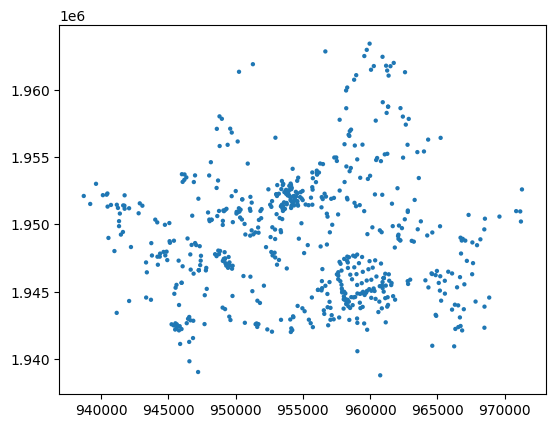

In [85]:
zero_one_buffer.plot()

In [86]:
gdf_starbucks['buffer'] = zero_one_buffer

In [87]:
gdf_polygon = gdf_starbucks[['사업장명', 'buffer']]

In [88]:
gdf_polygon.columns = ['사업장명', 'geometry']
gdf_polygon = gdf_polygon.to_crs(epsg=4326)

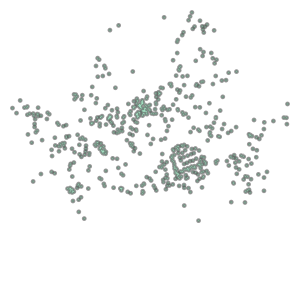

In [89]:
zero_one_coverage = zero_one_buffer.union_all()
zero_one_coverage

In [90]:
gdf_join_cafes = gpd.sjoin(gdf_polygon, gdf_cafes, how='inner')

In [91]:
number_of_cafes = gdf_join_cafes['사업장명_left'].value_counts().to_dict()

In [92]:
number_of_cafes

{'스타벅스 동대문두타점': 41,
 '스타벅스 종로수송점': 38,
 '스타벅스 마곡나루역점': 34,
 '스타벅스용산아이파크몰점': 30,
 '스타벅스 소공로점': 30,
 '스타벅스 명동메트로': 29,
 '스타벅스숙대점': 28,
 '스타벅스 을지로국제빌딩점': 28,
 '스타벅스 을지로경기빌딩': 27,
 '스타벅스 마곡GMG점': 26,
 '스타벅스아크플레이스': 25,
 '스타벅스여의도화재보험': 25,
 '스타벅스여의도점': 24,
 '스타벅스 신림타임스트림점': 24,
 '스타벅스 마곡사이언스타워R점': 24,
 '스타벅스 성신여대정문': 24,
 '스타벅스 서소문로점': 23,
 '스타벅스 종로3가점': 23,
 '스타벅스 삼성역섬유센터R점': 23,
 '스타벅스 을지로한국빌딩': 23,
 '스타벅스 광화문D타워점': 23,
 '스타벅스커피 코엑스몰점': 22,
 '스타벅스 코엑스아셈타워점': 22,
 '스타벅스 이대R점': 22,
 '스타벅스 가산에스케이점': 22,
 '스타벅스커피 현대디큐브 2F': 22,
 '스타벅스 스타필드코엑스몰R점': 22,
 '스타벅스 코엑스 별마당점': 22,
 '스타벅스 종각점': 22,
 '스타벅스 여의도신한투자증권타워': 22,
 '스타벅스 송파NC점': 22,
 '스타벅스 을지로삼화타워': 22,
 '스타벅스커피 현대디큐브 B2': 22,
 '스타벅스커피 보라매대교점': 21,
 '스타벅스 명동중앙로': 21,
 '스타벅스 환구단점': 21,
 '스타벅스커피 명동입구': 21,
 '스타벅스커피 역삼포스코점': 20,
 '스타벅스 마곡역점': 20,
 '스타벅스 혜화역점': 20,
 '스타벅스 명동 중앙로': 20,
 '스타벅스 독산역점': 20,
 '스타벅스 가산케이에스점': 20,
 '스타벅스 충무로점': 20,
 '스타벅스 선릉 세화빌딩점': 20,
 '스타벅스커피 여의도IFC(1F)점': 19,
 '스타벅스 마곡웰튼점': 19,
 '스타벅스 강남비젼타워점': 19,
 '스타벅스 더현대서울(B2)R'

In [93]:
home = home.reset_index()

In [96]:
home.drop('unique', axis=1, inplace=True)

In [97]:
gdf_polygon = gdf_polygon.to_crs(epsg=5179)

In [98]:
gdf_polygon

,사업장명,geometry
0,스타벅스숙대점,"POLYGON ((953097.964 1949609.95, 953097.189 19..."
1,스타벅스 이대R점,"POLYGON ((951227.06 1951159.778, 951226.285 19..."
2,스타벅스여의도점,"POLYGON ((949311.18 1947348.446, 949310.405 19..."
3,스타벅스압구정역점,"POLYGON ((958466.03 1947597.623, 958465.255 19..."
4,스타벅스-한양대점,"POLYGON ((959723.332 1950978.92, 959722.557 19..."
...,...,...
606,스타벅스 염창대로점,"POLYGON ((945240.547 1950093.85, 945239.772 19..."
607,스타벅스 성신여대입구역,"POLYGON ((957502.129 1954964.706, 957501.354 1..."
608,스타벅스 마포구청역점,"POLYGON ((947399.272 1951903.198, 947398.497 1..."
609,스타벅스 가산퍼블릭점,"POLYGON ((945956.261 1942115.22, 945955.486 19..."


In [99]:
import geopandas as gpd
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(home['x'], home['y'])]
gdf_home = gpd.GeoDataFrame(home, geometry=geometry, crs="EPSG:5179")

In [101]:
gdf_join_home = gpd.sjoin(gdf_polygon, gdf_home, how='inner')
print(gdf_join_home.shape)
gdf_join_home.head()

(112121, 22)


,사업장명,geometry,index_right0,index,pnu,x,y,count,yyyymmdd,area,...,deposit,rent,builtyear,시군구,번지,도로조건,전월세구분,도로명,군,구
0,스타벅스숙대점,"POLYGON ((953097.964 1949609.95, 953097.189 19...",44680,44680,1117011100,952948.6,1949455.9,1960,20120820,25.0,...,5000,0,NaN,서울특별시 용산구 청파동3가,9*,-,전세,NaN,용산구,청파동3가
0,스타벅스숙대점,"POLYGON ((953097.964 1949609.95, 953097.189 19...",44926,44926,1117011100,952925.4,1949455.9,1960,20140302,24.0,...,1000,60,1998.0,서울특별시 용산구 청파동3가,1**,-,월세,청파로43길,용산구,청파동3가
0,스타벅스숙대점,"POLYGON ((953097.964 1949609.95, 953097.189 19...",45495,45495,1117011100,952928.8,1949456.0,1960,20170408,15.7,...,8000,0,1992.0,서울특별시 용산구 청파동3가,1**,-,전세,NaN,용산구,청파동3가
0,스타벅스숙대점,"POLYGON ((953097.964 1949609.95, 953097.189 19...",45803,45803,1117011100,952943.5,1949456.0,1960,20181130,15.0,...,500,47,1999.0,서울특별시 용산구 청파동3가,4*,8m미만,월세,청파로43길,용산구,청파동3가
0,스타벅스숙대점,"POLYGON ((953097.964 1949609.95, 953097.189 19...",46041,46041,1117011100,952938.2,1949456.1,1960,20191116,12.0,...,8000,0,1983.0,서울특별시 용산구 청파동3가,1**,8m미만,전세,청파로43길,용산구,청파동3가


In [103]:
number_of_homes = gdf_join_home['사업장명'].value_counts().to_dict()
number_of_homes

{'스타벅스커피 서교동사거리': 2255,
 '스타벅스학동역점': 2028,
 '스타벅스 가락본동점': 1894,
 '스타벅스대치점': 1883,
 '스타벅스 중화역점': 1796,
 '스타벅스 남성역점': 1772,
 '스타벅스 압구정미소점': 1747,
 '스타벅스 관악서울대입구R점': 1739,
 '스타벅스 문정역2번출구': 1690,
 '스타벅스 경희대점': 1639,
 '스타벅스 홍대공항철도역점': 1620,
 '스타벅스 상왕십리역점': 1616,
 '스타벅스코리아 상봉역점': 1559,
 '스타벅스커피 가산브이타워': 1493,
 '스타벅스 커피 청담점': 1479,
 '스타벅스숙대점': 1235,
 '스타벅스 홍대동교점': 1151,
 '스타벅스 성신여대정문': 1140,
 '스타벅스노량진역점': 1133,
 '스타벅스 홍대역8번출구점': 1131,
 '스타벅스 압구정현대아파트점': 1085,
 '스타벅스 숙명여대정문점': 1074,
 '스타벅스커피연희DT점': 1029,
 '스타벅스 마포구청역점': 1024,
 '스타벅스커피(starbucks coffee)상수역점': 1023,
 '스타벅스커피홍대역': 1009,
 '스타벅스 북가좌DT점': 994,
 '스타벅스 왕십리역점': 977,
 '스타벅스 어린이대공원역점': 962,
 '스타벅스건국대점': 951,
 '스타벅스논현힐탑': 925,
 '스타벅스 잠실 새내역점': 918,
 '스타벅스연대점': 880,
 '스타벅스 남가좌사거리점': 853,
 '스타벅스 상도역점': 851,
 '스타벅스커피 역삼대로점': 826,
 '스타벅스 서울교대점': 821,
 '스타벅스커피 금천독산점': 788,
 '스타벅스커피 광나루점': 788,
 '스타벅스 망원한강공원점': 774,
 '스타벅스 서울숲역점': 771,
 '스타벅스 녹번역점': 763,
 '스타벅스 장안사거리점': 761,
 '스타벅스 강동암사DT': 747,
 '스타벅스 서울대입구역8번출구점': 717,
 '스타벅스 구로구청점': 710,
 '스

In [104]:
gdf_join_cafes.to_csv('./seoul/cafes_in_starbucks.csv', index=False)
gdf_join_home.to_csv('./seoul/homes_in_starbucks.csv', index=False)

In [106]:
join_home = pd.read_csv('./seoul/homes_in_starbucks.csv')
join_cafes = pd.read_csv('./seoul/cafes_in_starbucks.csv')

In [108]:
join_cafes

,사업장명_left,geometry,index_right,개방자치단체코드,관리번호,인허가일자,소재지면적,소재지우편번호,소재지전체주소,도로명전체주소,도로명우편번호,사업장명_right,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,시설총규모,Latitude,Longitude
0,스타벅스숙대점,POLYGON ((126.96906022160336 37.54462830071215...,368,3020000,3020000-104-2009-00060,2009-08-25,23.10,140-133,서울특별시 용산구 청파동3가 118-280번지 (지상1층),"서울특별시 용산구 청파로43길 71 (청파동3가,(지상1층))",4313.0,일미오카페,커피숍,196986.703339,449085.983346,커피숍,23.10,37.544027,126.966691
1,스타벅스숙대점,POLYGON ((126.96906022160336 37.54462830071215...,5202,3020000,3020000-104-2018-00095,2018-08-31,86.29,140-133,"서울특별시 용산구 청파동3가 109-12번지 지하1층, 지상1,2층","서울특별시 용산구 청파로47길 37-22, 지하1, 지상1,2층 (청파동3가)",4313.0,레드우드(Redwood),커피숍,197097.386769,449111.355278,커피숍,86.29,37.544256,126.967944
2,스타벅스숙대점,POLYGON ((126.96906022160336 37.54462830071215...,7995,3020000,3020000-104-2021-00022,2021-03-08,15.00,140-132,서울특별시 용산구 청파동2가 71-40,"서울특별시 용산구 청파로45길 39, 1층 (청파동2가)",4313.0,에그맛있다,커피숍,197135.174506,449140.237984,커피숍,15.00,37.544517,126.968371
3,스타벅스숙대점,POLYGON ((126.96906022160336 37.54462830071215...,12613,3020000,3020000-104-2023-00153,2023-08-25,85.95,140-133,서울특별시 용산구 청파동3가 109-20,"서울특별시 용산구 청파로47길 41, 1층 (청파동3가)",4313.0,메가엠지씨커피 숙명여대점,커피숍,197106.117284,449143.348928,커피숍,85.95,37.544545,126.968042
4,스타벅스숙대점,POLYGON ((126.96906022160336 37.54462830071215...,10127,3020000,3020000-104-2022-00063,2022-05-16,151.80,140-133,서울특별시 용산구 청파동3가 111-9 캠퍼스프라자,"서울특별시 용산구 청파로47길 49, 캠퍼스프라자 1층 (청파동3가)",4313.0,스택빈 숙대점,커피숍,197059.739244,449146.256652,커피숍,151.80,37.544571,126.967518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5672,스타벅스 가산퍼블릭점,POLYGON ((126.88876985828149 37.47668610602957...,1684,3170000,3170000-104-2013-00070,2013-09-30,13.20,153-801,서울특별시 금천구 가산동 60-27번지 W-MALL 지하1층,"서울특별시 금천구 디지털로 188, 지하1층 (가산동, W-MALL)",8513.0,공차 W몰점,커피숍,189997.455663,441687.841172,커피숍,13.20,37.477321,126.887706
5673,스타벅스 강동강일점,POLYGON ((127.17668355640063 37.57227063899049...,9148,3240000,3240000-104-2021-00259,2021-10-20,43.29,134-100,서울특별시 강동구 강일동 76-2 아이메디컬,"서울특별시 강동구 아리수로93나길 38, 아이메디컬 1층 116호 (강일동)",5415.0,컴포즈커피 강동강일점,커피숍,215303.913311,452189.755118,커피숍,43.29,37.571871,127.174024
5674,스타벅스 강동강일점,POLYGON ((127.17668355640063 37.57227063899049...,8996,3240000,3240000-104-2021-00239,2021-09-16,68.88,134-100,서울특별시 강동구 강일동 76-2 아이메디컬,"서울특별시 강동구 아리수로93나길 38, 아이메디컬 4층 409호 (강일동)",5415.0,디저트카페제이(Dessert cafe J),커피숍,215303.913311,452189.755118,커피숍,68.88,37.571871,127.174024
5675,스타벅스 강동강일점,POLYGON ((127.17668355640063 37.57227063899049...,8078,3240000,3240000-104-2021-00067,2021-03-29,82.00,134-100,서울특별시 강동구 강일동 76-2 아이메디컬,"서울특별시 강동구 아리수로93나길 38, 아이메디컬 1층 101,102호 (강일동)",5415.0,메가엠지씨커피 강일2지구,커피숍,215303.913311,452189.755118,커피숍,82.00,37.571871,127.174024


In [112]:
home['yyyymmdd'].min(), home['yyyymmdd'].max()

(20110101, 20200331)